# House Price Prediction Assignment
### Problem 1: Selection of features for practice
- After loading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice.



In [1]:
# loading the dataset
import pandas as pd
import numpy as np
train_data = pd.read_csv('train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# extracting explanatory variables GrLivArea and YearBuilt and objective SalePrice
house_data = train_data[['GrLivArea','YearBuilt','SalePrice']]
house_data

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


### Problem 2: Estimation and evaluation by linear regression

In [5]:
# create explanatory data X
house_datax = house_data.drop('SalePrice', axis = 'columns')
X = house_datax.to_numpy()# convert X to ndarray
X

array([[1710, 2003],
       [1262, 1976],
       [1786, 2001],
       ...,
       [2340, 1941],
       [1078, 1950],
       [1256, 1965]], dtype=int64)

In [7]:
# creating objective variable y
house_datay = house_data['SalePrice']
y = house_datay.to_numpy() # convert y to ndarray
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [8]:
print(X.shape)
print(y.shape)

(1460, 2)
(1460,)


In [9]:
# splitting data into training and validation data(75% training and 25% testing)
from sklearn.model_selection import train_test_split #splitting module
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)


In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 2)
(365, 2)
(1095,)
(365,)


In [12]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)


StandardScaler()


In [16]:
# assigning X_train and X_test to standardized value
X_train = scaler.transform(X_train )
X_test = scaler.transform(X_test)

In [22]:
# using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred

array([260189.04102669, 128045.02283478, 233296.21297939, 262685.50595218,
       156330.13675995, 216909.22190134, 301790.15321574, 135232.08090553,
       136011.76584453, 182375.26880079, 178611.53488747, 239507.54102852,
       175815.39596288, 124792.92365045, 266985.13278007, 173042.18387056,
       191996.10614275, 278211.5480831 , 242031.2812647 , 181548.04442542,
       135621.92337503, 199272.77075996, 113994.42386711, 122572.08204392,
       242237.00023894, 166341.94041929, 206009.75590811, 224905.90292838,
       106355.1920911 , 148914.99480662, 148429.30403502, 210730.28707067,
       133202.93590321, 194274.72300121, 237025.660397  , 214147.36947246,
       170645.35380166, 288322.63218049, 156989.15328732,  88417.17367337,
       134957.78893988, 222422.12901962, 181409.00516536, 183386.05474747,
       194635.39688278, 112315.7169308 , 238164.68786426, 235664.4363843 ,
       242928.40998478,  99072.84764218, 223961.79669587, 197357.84490818,
       138889.16877726, 1

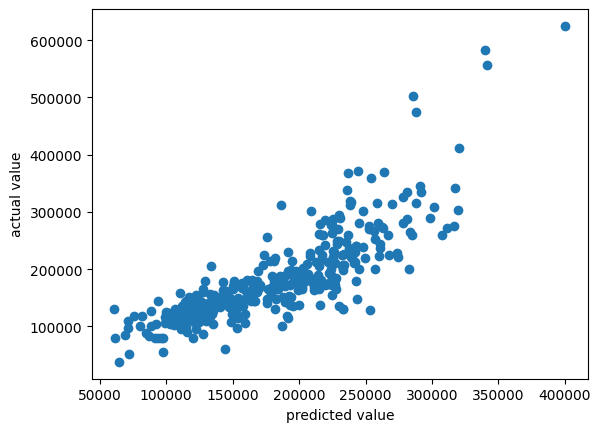

In [24]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

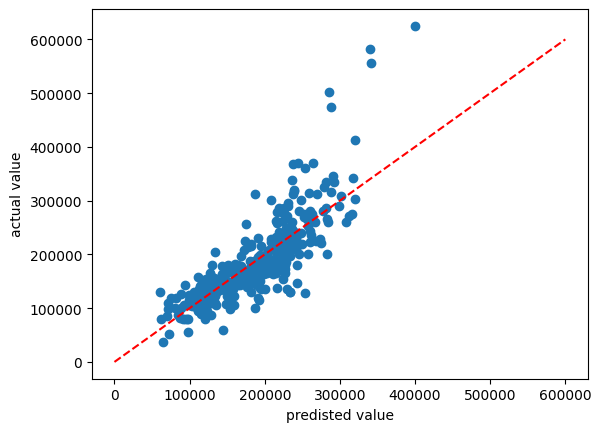

In [27]:
# drawing a straight line on the scatterplot to better visualize how reliable the prediction is.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 600000), (0, 600000), linestyle='dashed', color='red')
ax.set_xlabel('predisted value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
# Since most of the data are gathered near the straight line of , it can be seen that the prediction results are relatively reliable.

### Problem 3: Comparison of Methods
- Since we have already used linear regression we start with SVM
#### Method 1: SVM

In [28]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [29]:
y_predsvm = svm_model.predict(X_test)
y_predsvm

array([215000, 140000, 215000, 215000, 145000, 180000, 250000, 110000,
       139000, 155000, 155000, 190000, 155000, 110000, 250000, 145000,
       190000, 250000, 215000, 155000, 110000, 190000, 110000, 140000,
       215000, 155000, 180000, 215000, 110000, 155000, 139000, 180000,
       139000, 180000, 215000, 180000, 155000, 235000, 145000, 110000,
       140000, 180000, 145000, 180000, 190000, 110000, 215000, 190000,
       215000, 135000, 215000, 180000, 139000, 155000, 140000, 145000,
       110000, 145000, 190000, 215000, 110000, 250000, 140000, 155000,
       215000, 140000, 135000, 180000, 180000, 139000, 110000, 250000,
       180000, 215000, 140000, 110000, 180000, 155000, 190000, 155000,
       250000, 180000, 110000, 135000, 145000, 139000, 110000, 110000,
       110000, 190000, 135000, 180000, 180000, 140000, 155000, 135000,
       235000, 110000, 215000, 110000, 135000, 250000, 250000, 155000,
       215000, 140000, 110000, 180000, 180000, 215000, 250000, 190000,
      

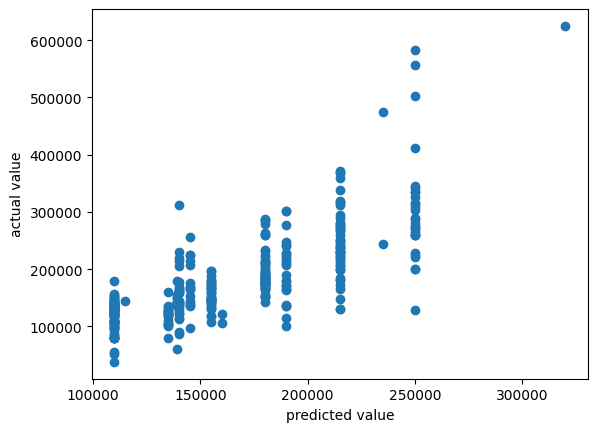

In [30]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predsvm, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

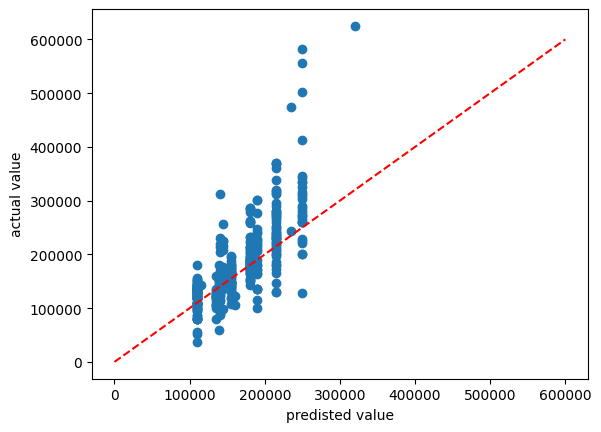

In [34]:
# drawing a straight line on the scatterplot to better visualize how reliable the prediction is.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predsvm, y_test)
ax.plot((0, 600000), (0, 600000), linestyle='dashed', color='red')
ax.set_xlabel('predisted value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
# Its clear that svm is not reliable in predicting the data

#### Method 2: Decision Tree

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_predtree = tree.predict(X_test)
y_predtree

array([305900, 138887, 130000, 423000, 152000, 214000, 340000, 169900,
       139000, 155000, 155000, 190000, 145000, 128500, 262280, 140000,
       110000, 415298, 227875, 152000, 142000, 163500,  92900, 125000,
       261500, 152000, 217000, 328900, 114500, 148000, 174900, 392000,
       132500, 164500, 245350, 184000, 153900, 107500, 157900, 116000,
       131000, 245000, 135000, 160000, 205000, 112000, 297000, 189000,
       319000, 139000, 200500, 164990, 134000, 159000, 161000, 149500,
       115000, 135000, 207500, 254900, 135000, 250000, 163000, 106000,
       214000, 125000, 125500, 179665, 179665, 101800, 149900, 154300,
       164700, 255000, 184000, 145000, 221000, 127500, 202900, 125000,
       239686, 180000,  79500, 158500, 139000, 146000,  79500, 109900,
        82500, 139000, 103600, 169000, 175900, 138887, 124000, 141000,
       179500, 115000, 315000, 111250, 103000, 446261, 361919, 124000,
       225000, 152000, 132000, 179900, 177000, 297000, 415298, 187500,
      

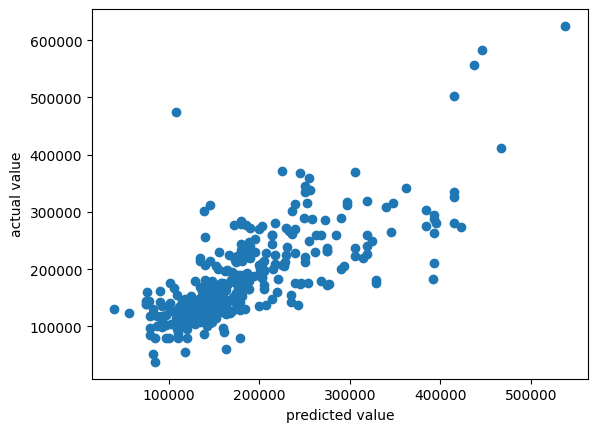

In [33]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predtree, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

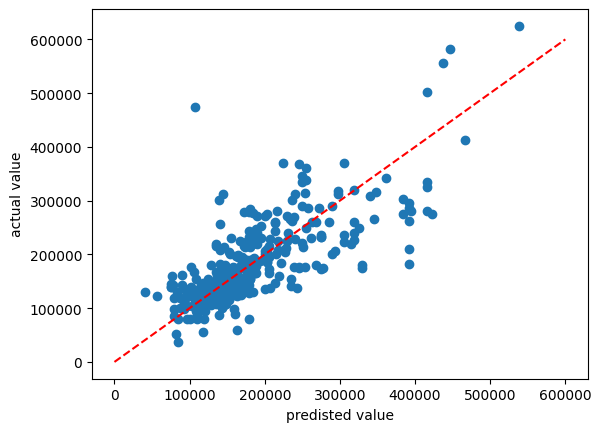

In [35]:
# drawing a straight line on the scatterplot to better visualize how reliable the prediction is.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predtree, y_test)
ax.plot((0, 600000), (0, 600000), linestyle='dashed', color='red')
ax.set_xlabel('predisted value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
# Since most of the data are gathered near the straight line of , it can be seen that the prediction results are relatively reliable but not as good as linear regression

#### Method 3: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_predforest = forest.predict(X_test)
y_predforest

array([215000, 140000, 130000, 222500, 113000, 214000, 340000, 128000,
       139000, 195400, 148800, 190000, 145000, 129000, 142953, 144500,
       110000, 385000, 227875, 190000, 156000, 136905,  92900, 137500,
       261500, 144000, 217000, 328900, 120000, 148000, 174900, 392000,
       132500, 164500, 245350, 184000, 153900, 295000, 157900, 116000,
       131000, 245000, 127000, 160000, 205000, 112000, 297000, 189000,
       319000, 109900, 200500, 164990, 146000, 160000, 105000, 144500,
       132500, 118000, 207500, 219500, 147000, 250000, 167500, 106000,
       230500, 125000, 114500, 179665, 265900, 101800, 149900, 375000,
       164700, 255000, 129900, 136000, 221000, 127500, 194500, 118500,
       250000, 180000,  99900, 158500, 141000, 146000,  99900, 109900,
       113000, 139000, 103600, 169000, 175900, 138887, 124000, 141000,
       266500, 138500, 315000, 128500, 103000, 446261, 361919, 124000,
       225000, 188700, 132000, 179900, 235000, 297000, 415298, 154300,
      

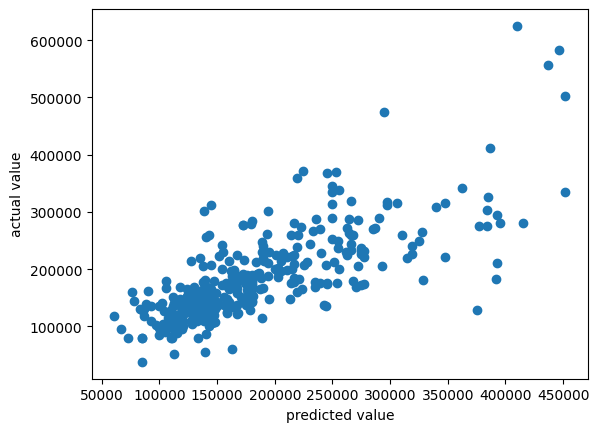

In [38]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predforest, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

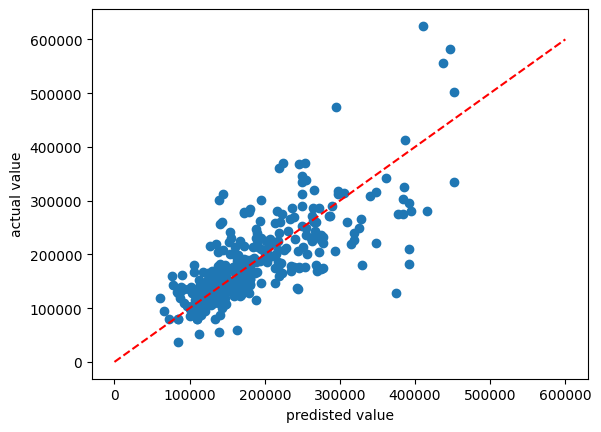

In [39]:
# drawing a straight line on the scatterplot to better visualize how reliable the prediction is.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predforest, y_test)
ax.plot((0, 600000), (0, 600000), linestyle='dashed', color='red')
ax.set_xlabel('predisted value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
# Since most of the data are gathered near the straight line of , it can be seen that the prediction results are relatively reliable but not as good as linear regression but its much better than SVM 

### Problem 4: (Advanced Task) Learning using other feature values

In [42]:
# I will use linear regression and add extra columns 'YrSold' and 'LotArea'
house_data2 = train_data[['GrLivArea','YearBuilt','YrSold','LotArea','SalePrice']]
house_data2


,GrLivArea,YearBuilt,YrSold,LotArea,SalePrice
0,1710,2003,2008,8450,208500
1,1262,1976,2007,9600,181500
2,1786,2001,2008,11250,223500
3,1717,1915,2006,9550,140000
4,2198,2000,2008,14260,250000
...,...,...,...,...,...
1455,1647,1999,2007,7917,175000
1456,2073,1978,2010,13175,210000
1457,2340,1941,2010,9042,266500
1458,1078,1950,2010,9717,142125


In [43]:
# create explanatory data X
house_data2x = house_data2.drop('SalePrice', axis = 'columns')
X = house_data2x.to_numpy()# convert X to ndarray
X

array([[ 1710,  2003,  2008,  8450],
       [ 1262,  1976,  2007,  9600],
       [ 1786,  2001,  2008, 11250],
       ...,
       [ 2340,  1941,  2010,  9042],
       [ 1078,  1950,  2010,  9717],
       [ 1256,  1965,  2008,  9937]], dtype=int64)

In [44]:
# y remains the same
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [45]:
# splitting data into training and validation data(75% training and 25% testing)
from sklearn.model_selection import train_test_split #splitting module
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)


In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(365, 4)
(1095,)
(365,)


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)


StandardScaler()


In [48]:
# assigning X_train and X_test to standardized value
X_train = scaler.transform(X_train )
X_test = scaler.transform(X_test)

In [49]:
# using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)
y_pred

array([259125.1868531 , 124993.96747751, 226374.02155453, 259246.01271867,
       156581.32577996, 219925.37402685, 299931.63083479, 135478.44585732,
       136243.04267074, 182133.63655755, 183059.70821331, 236923.05722793,
       171487.52132423, 125359.68638923, 266740.15435769, 176250.1021585 ,
       200546.91722939, 275808.60030252, 242396.25746454, 180828.40639573,
       136983.30562901, 197578.63363246, 112136.40138134, 122009.04374018,
       243576.37114301, 169159.90957344, 208568.90561914, 236360.19491568,
       106677.33460382, 149751.93613879, 148191.73870463, 212445.34463502,
       131772.14697881, 196946.2885048 , 235509.07904703, 213707.71486974,
       171940.39446881, 288818.49400384, 157939.17726571,  86666.4006171 ,
       136022.38239022, 218071.50709552, 198742.69490326, 180833.45992364,
       199956.94289448, 112972.24352379, 236475.89653684, 250535.65966074,
       241182.93005989,  97030.18039975, 225548.04751777, 195228.93341645,
       139493.16210782, 1

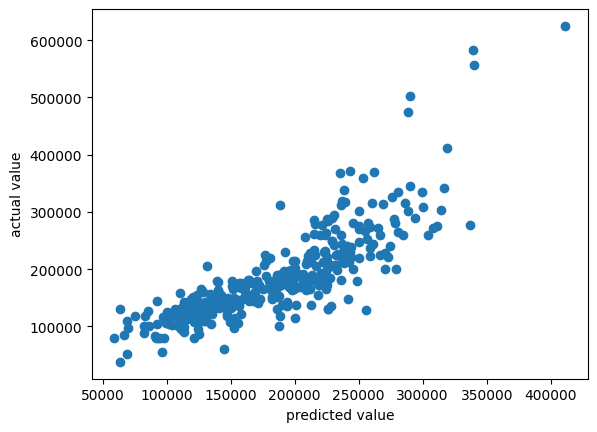

In [51]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

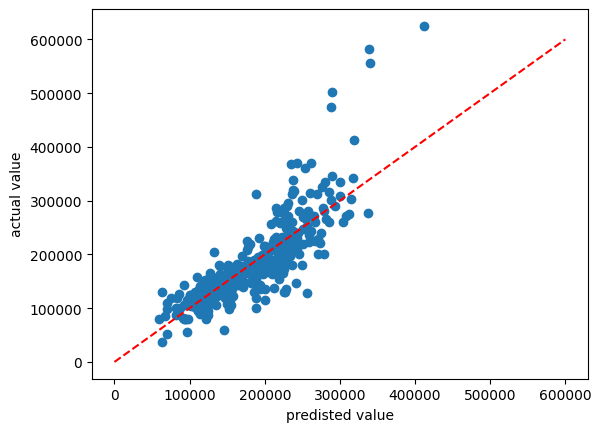

In [52]:
# drawing a straight line on the scatterplot to better visualize how reliable the prediction is.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 600000), (0, 600000), linestyle='dashed', color='red')
ax.set_xlabel('predisted value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
# There is a slight difference between the graph with 2 columns and this with 4 columns